In [276]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [277]:
# Function to analyze tweets; import twitter username, output plot
def AnalyzeTweets(target_users):
    counter = 1
    data = []
    oldest_tweet = None
    
    for target_user in target_users:
        # loop through 100 tweets (5 pages)
        for i in range(5):
            # Get tweets
            public_tweets = api.user_timeline(target_user) #, max_id = oldest_tweet)

            for tweet in public_tweets:
                #print("Tweet {}: {} - {}".format(counter, tweet["text"], tweet["created_at"]))

                # Get relative timestamp from time format "Sat May 26 18:04:07 +0000 2018"
                created_at = tweet["created_at"]
                timestamp = datetime.strptime(created_at, "%a %B %d %H:%M:%S %z %Y").timestamp()

                # Analyze each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]

                data.append({"Target User": target_user, 
                                  "Timestamp": timestamp,
                                  "Compound": compound,
                                  "Tweets Ago": counter})

                # Increment counter
                counter += 1
            
    # Turn data into dataframe
    df = pd.DataFrame(data)
    
    # Plot data
    for target, group in df.groupby("Target User"):
        plt.scatter(x=group["Timestamp"], y=group["Compound"], label=target)
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.grid(alpha=0.3)
    plt.ylim(-1,1)

    now = datetime.now().strftime("%Y-%m-%d %H:%M")
    plt.title("Sentiment Analysis of Tweets ({})".format(now))
    plt.xlabel("Timestamp")
    plt.ylabel("Compound Score")
    
    return df


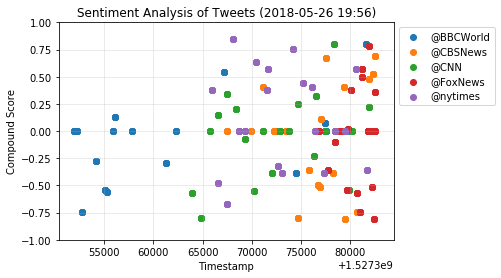

In [278]:
# List of target users to analyze 
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

df = AnalyzeTweets(target_users)
plt.show()

In [279]:
avg_sentiments = df.groupby("Target User")["Compound"].mean()
avg_sentiments

Target User
@BBCWorld   -0.062490
@CBSNews    -0.040650
@CNN        -0.042945
@FoxNews    -0.051885
@nytimes     0.119560
Name: Compound, dtype: float64

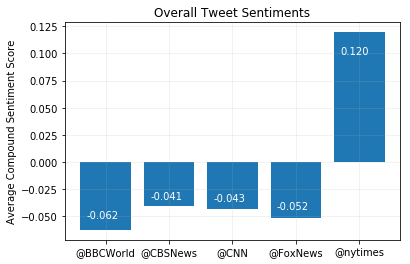

In [280]:
# Make bar plot with overall tweet sentiments
x_axis = np.arange(0, len(target_users))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
   
plt.bar(x_axis, avg_sentiments)
plt.xticks(tick_locations, target_users)
plt.grid(alpha=0.2)

for i, v in enumerate(avg_sentiments):
    plt.text(i-0.3, (v/1.2), "{:.3f}".format(v), color='white')

plt.title("Overall Tweet Sentiments")
plt.ylabel("Average Compound Sentiment Score")

plt.show()

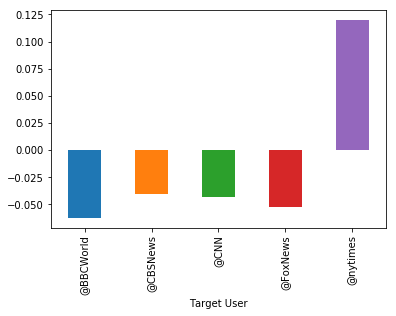

In [281]:
avg_sentiments.plot(kind='bar')